In [205]:
%load_ext autoreload
%autoreload
import model as md
import utilities as ut
import numpy as np
import keras 
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.models import Model
from keras.layers.core import Dense, Dropout, Activation, Flatten

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
beijing_subjects = os.listdir('fmri')
beijing_subjects.remove('.DS_Store')
ohsu_subjects = os.listdir('../ohsu_test_output_nifty/fmri')
nyu_subjects = os.listdir('../nyu_test_output_nifty/fmri_nyu_test')

In [8]:
data_beijing = []
for filename in beijing_subjects:
    data_beijing.append(ut.img_get_data('fmri/' + filename))
variance_beijing = []
for subject in data_beijing:
    variance_beijing.append(ut.variance(subject))
variance_beijing = np.array(variance_beijing)

In [9]:
data_ohsu = []
for filename in ohsu_subjects:
    data_ohsu.append(ut.img_get_data('../ohsu_test_output_nifty/fmri/' + filename))
variance_ohsu = []
for subject in data_ohsu:
    variance_ohsu.append(ut.variance(subject))
variance_ohsu = np.array(variance_ohsu)

In [10]:
data_nyu = []
for filename in nyu_subjects:
    data_nyu.append(ut.img_get_data('../nyu_test_output_nifty/fmri_nyu_test/' + filename))
data_nyu = np.array(data_nyu)
variance_nyu = []
for subject in data_nyu:
    variance_nyu.append(ut.variance(subject))
variance_nyu = np.array(variance_nyu)

In [11]:
variance_nyu.shape

(41, 53, 64, 46)

In [12]:
variance_total = np.append(variance_beijing, variance_nyu, axis = 0)
variance_total = np.append(variance_total, variance_ohsu, axis = 0)

In [13]:
final_tab = pd.read_csv("final_table.csv")

In [14]:
final_tab

,Unnamed: 0,ScanDir ID,Site,Gender,Age,Handedness,DX,Secondary Dx,ADHD Measure,ADHD Index,Inattentive,Hyper/Impulsive,IQ Measure,Verbal IQ,Performance IQ,Full2 IQ,Full4 IQ,Med Status,QC_Athena,QC_NIAK
0,776,1038415,1,1.0,14.92,1,3,ODD,1.0,52.0,34.0,18.0,3.0,109.0,103.0,-999.0,107.0,1.0,0.0,0.0
1,777,1201251,1,1.0,12.33,1,3,NaN,1.0,49.0,28.0,21.0,3.0,115.0,103.0,-999.0,110.0,2.0,1.0,1.0
2,778,1245758,1,0.0,8.58,1,0,NaN,1.0,35.0,20.0,15.0,3.0,121.0,88.0,-999.0,106.0,1.0,1.0,1.0
3,779,1253411,1,1.0,8.08,1,0,NaN,1.0,35.0,19.0,16.0,3.0,119.0,106.0,-999.0,114.0,1.0,1.0,1.0
4,780,1419103,1,0.0,9.92,1,0,NaN,1.0,41.0,22.0,19.0,3.0,124.0,76.0,-999.0,102.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,959,23038,6,1.0,9.33,1,0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,124.0,NaN,1.0,1.0
121,960,23039,6,1.0,11.17,1,0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,114.0,NaN,1.0,1.0
122,961,23040,6,0.0,7.50,1,0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,126.0,NaN,1.0,1.0
123,962,23041,6,0.0,9.92,1,0,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,128.5,NaN,1.0,1.0


In [15]:
def average_variance_along(var_matrix, axis):
    shape = var_matrix.shape
    if axis == 0:
        average_matrix = np.zeros((shape[0],shape[2],shape[3]))
        for i in range(shape[0]):
            for j in range(shape[2]):
                for k in range(shape[3]):
                    average_matrix[i,j,k] = np.mean(var_matrix[i,:,j,k])
    elif axis == 1:
        average_matrix = np.zeros((shape[0],shape[1],shape[3]))
        for i in range(shape[0]):
            for j in range(shape[1]):
                for k in range(shape[3]):
                    average_matrix[i,j,k] = np.mean(var_matrix[i,j,:,k])
    elif axis == 2:
        average_matrix = np.zeros((shape[0],shape[1],shape[2]))
        for i in range(shape[0]):
            for j in range(shape[1]):
                for k in range(shape[2]):
                    average_matrix[i,j,k] = np.mean(var_matrix[i,j,k,:])
    else:
        print("please enter digit between 0 to 2")
        return shape
    return average_matrix

In [236]:
X_train_x = average_variance_along(variance_total, axis = 0)

In [237]:
X_train_x = X_train_x.reshape(X_train_x.shape[0],1,X_train_x.shape[1],X_train_x.shape[2])

In [238]:
X_train_y = average_variance_along(variance_total, axis = 1)
X_train_z = average_variance_along(variance_total, axis = 2)

In [239]:
X_train_y = X_train_y.reshape(X_train_y.shape[0],1,X_train_y.shape[1],X_train_y.shape[2])
X_train_z = X_train_z.reshape(X_train_z.shape[0],1,X_train_z.shape[1],X_train_z.shape[2])

In [240]:
y_train = np.array(final_tab["DX"])
y_train = keras.utils.to_categorical(y_train, num_classes=4)

In [241]:
X_train_x, X_test_x, X_train_y, X_test_y, X_train_z, X_test_z, y_train, y_test = train_test_split(X_train_x, X_train_y, X_train_z, y_train, test_size=0.15, random_state=42)

In [183]:
adhd_model = md.get_model([(X_train_x.shape[1],X_train_x.shape[2],X_train_x.shape[3]), 
                           (X_train_y.shape[1],X_train_y.shape[2],X_train_y.shape[3]), 
                           (X_train_z.shape[1],X_train_z.shape[2], X_train_z.shape[3])])

In [184]:
adhd_model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
conv2d_61_input (InputLayer)    (None, 1, 64, 46)    0                                            
__________________________________________________________________________________________________
conv2d_63_input (InputLayer)    (None, 1, 53, 46)    0                                            
__________________________________________________________________________________________________
conv2d_65_input (InputLayer)    (None, 1, 53, 64)    0                                            
__________________________________________________________________________________________________
conv2d_61 (Conv2D)              (None, 32, 62, 44)   320         conv2d_61_input[0][0]            
__________________________________________________________________________________________________
conv2d_63 

In [185]:
adhd_model_trained, history = md.train(adhd_model,[X_train_x, X_train_y, X_train_z], y_train)

Train on 84 samples, validate on 22 samples
Epoch 1/15
84/84 [==============================] - 4s 50ms/step - loss: 5.6271 - acc: 0.4167 - val_loss: 2.8332 - val_acc: 0.6364
Epoch 2/15
84/84 [==============================] - 2s 28ms/step - loss: 4.1658 - acc: 0.5476 - val_loss: 2.7638 - val_acc: 0.6364
Epoch 3/15
84/84 [==============================] - 2s 25ms/step - loss: 3.9079 - acc: 0.5476 - val_loss: 2.6627 - val_acc: 0.6364
Epoch 4/15
84/84 [==============================] - 2s 27ms/step - loss: 3.5650 - acc: 0.5833 - val_loss: 2.6502 - val_acc: 0.5909
Epoch 5/15
84/84 [==============================] - 2s 22ms/step - loss: 3.7700 - acc: 0.6071 - val_loss: 2.6579 - val_acc: 0.5909
Epoch 6/15
84/84 [==============================] - 2s 23ms/step - loss: 3.8200 - acc: 0.5833 - val_loss: 2.6745 - val_acc: 0.6364
Epoch 7/15
84/84 [==============================] - 2s 22ms/step - loss: 3.8061 - acc: 0.5833 - val_loss: 2.7679 - val_acc: 0.6364
Epoch 8/15
84/84 [=====================

In [85]:
test_result = adhd_model_trained.evaluate([X_test_x, X_test_y, X_test_z], y_test)

16/16 [==============================] - 0s 11ms/step


In [86]:
test_result[1]

0.625

In [133]:
fe1_h1 = Model(inputs = adhd_model.inputs[0], outputs = adhd_model.layers[3].output)

In [134]:
fe1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_43_input (InputLayer) (None, 1, 64, 46)         0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 32, 62, 44)        320       
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


In [154]:
fe2_h1 = Model(inputs = adhd_model.inputs[1], outputs = adhd_model.layers[4].output)

In [103]:
fe2_h1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_45_input (InputLayer) (None, 1, 53, 46)         0         
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 32, 51, 44)        320       
Total params: 320
Trainable params: 320
Non-trainable params: 0
_________________________________________________________________


In [155]:
fe3_h1 = Model(inputs = adhd_model.inputs[2], outputs = adhd_model.layers[5].output)

In [156]:
fe1_h2 = Model(inputs = adhd_model.inputs[0], outputs = adhd_model.layers[9].output)

In [123]:
fe1_h2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_43_input (InputLayer) (None, 1, 64, 46)         0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 32, 62, 44)        320       
_________________________________________________________________
max_pooling2d_43 (MaxPooling (None, 16, 31, 44)        0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 14, 29, 15)        5955      
Total params: 6,275
Trainable params: 6,275
Non-trainable params: 0
_________________________________________________________________


In [157]:
fe2_h2 = Model(inputs = adhd_model.inputs[1], outputs = adhd_model.layers[10].output)
fe2_h3 = Model(inputs = adhd_model.inputs[2], outputs = adhd_model.layers[11].output)

In [137]:
feature_map_11 = fe1_h1.predict(X_train_x[5].reshape(1,X_train_x.shape[1],X_train_x.shape[2],X_train_x.shape[3]))

In [138]:
feature_map.shape

(1, 32, 62, 44)

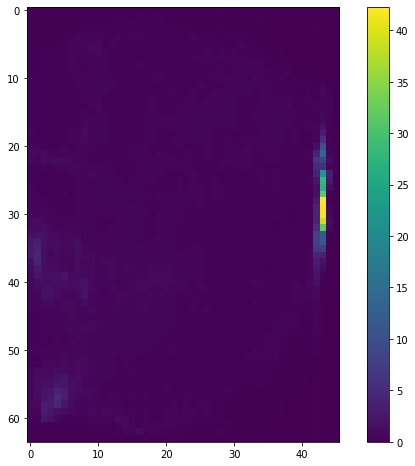

In [152]:
plt.imshow(X_train_x[5][0])
plt.colorbar()

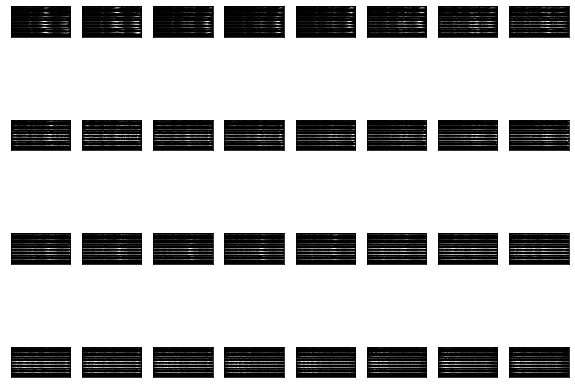

In [149]:
plt.rcParams['figure.figsize'] = 10, 8
length = 4
width = 8
ix = 1
for i in range(length):
    for j in range(width):
        # specify subplot and turn of axis
        ax = plt.subplot(length, width, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        plt.imshow(feature_map[0, :, :, ix-1], cmap='gray')
        ix += 1

In [158]:
feature_map_12 = fe1_h2.predict(X_train_x[5].reshape(1,X_train_x.shape[1],X_train_x.shape[2],X_train_x.shape[3]))

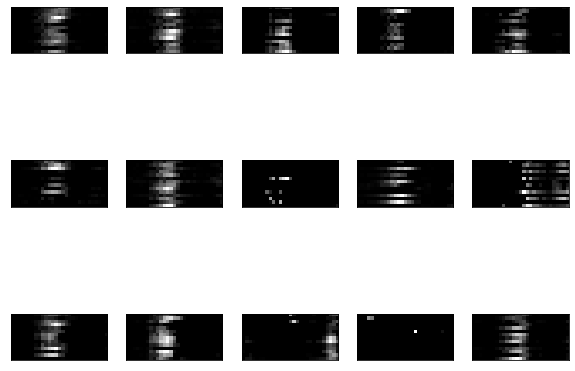

In [160]:
plt.rcParams['figure.figsize'] = 10, 8
length = 3
width = 5
ix = 1
for i in range(length):
    for j in range(width):
        # specify subplot and turn of axis
        ax = plt.subplot(length, width, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        plt.imshow(feature_map_12[0, :, :, ix-1], cmap='gray')
        ix += 1

In [165]:
mean_beijing = []
for subject in data_beijing:
    mean_beijing.append(ut.averaging_slide(subject))
mean_beijing = np.array(mean_beijing)

In [166]:
mean_ohsu = []
for subject in data_ohsu:
    mean_ohsu.append(ut.averaging_slide(subject))
mean_ohsu = np.array(mean_ohsu)

In [167]:
mean_nyu = []
for subject in data_nyu:
    mean_nyu.append(ut.averaging_slide(subject))
mean_nyu = np.array(mean_nyu)

In [170]:
mean_total = np.append(mean_beijing, mean_nyu, axis = 0)
mean_total = np.append(mean_total, mean_ohsu, axis = 0)

In [188]:
X_train_x = average_variance_along(mean_total, axis = 0)
X_train_y = average_variance_along(mean_total, axis = 1)
X_train_z = average_variance_along(mean_total, axis = 2)
X_train_x = X_train_x.reshape(X_train_x.shape[0],1,X_train_x.shape[1],X_train_x.shape[2])
X_train_y = X_train_y.reshape(X_train_y.shape[0],1,X_train_y.shape[1],X_train_y.shape[2])
X_train_z = X_train_z.reshape(X_train_z.shape[0],1,X_train_z.shape[1],X_train_z.shape[2])

In [210]:
y_train = np.array(final_tab["DX"])
y_train = keras.utils.to_categorical(y_train, num_classes=4)

In [190]:
X_train_x, X_test_x, X_train_y, X_test_y, X_train_z, X_test_z, y_train, y_test = train_test_split(X_train_x, X_train_y, X_train_z, y_train, test_size=0.15, random_state=42)

In [191]:
adhd_model_m = md.get_model([(X_train_x.shape[1],X_train_x.shape[2],X_train_x.shape[3]), 
                           (X_train_y.shape[1],X_train_y.shape[2],X_train_y.shape[3]), 
                           (X_train_z.shape[1],X_train_z.shape[2], X_train_z.shape[3])])

In [192]:
adhd_model_trained_m, history = md.train(adhd_model_m,[X_train_x, X_train_y, X_train_z], y_train)

Train on 84 samples, validate on 22 samples
Epoch 1/15
84/84 [==============================] - 4s 53ms/step - loss: 13.8553 - acc: 0.0833 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 2/15
84/84 [==============================] - 2s 21ms/step - loss: 15.7343 - acc: 0.0238 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 3/15
84/84 [==============================] - 2s 22ms/step - loss: 15.7343 - acc: 0.0238 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 4/15
84/84 [==============================] - 2s 22ms/step - loss: 15.7343 - acc: 0.0238 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 5/15
84/84 [==============================] - 2s 21ms/step - loss: 15.7343 - acc: 0.0238 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 6/15
84/84 [==============================] - 2s 21ms/step - loss: 15.7343 - acc: 0.0238 - val_loss: 16.1181 - val_acc: 0.0000e+00
Epoch 7/15
84/84 [==============================] - 2s 22ms/step - loss: 15.7343 - acc: 0.0238 - val_loss: 16.1181 - val_acc: 0.0000e+

In [203]:
adhd_new_model = md.feature_extractor((variance_total.shape[1],variance_total.shape[2],variance_total.shape[3]))

In [206]:
adhd_new_model.add(Dense(64, activation='relu'))
adhd_new_model.add(Dense(32, activation='relu'))
adhd_new_model.add(Dense(4, activation = 'softmax'))

In [212]:
y_train = np.array(final_tab["DX"])
y_train = keras.utils.to_categorical(y_train, num_classes=4)

In [213]:
X_train, X_test, y_train, y_test = train_test_split(variance_total, y_train, test_size=0.15, random_state=42)

In [214]:
adhd_new_model, history = md.train(adhd_new_model,X_train, y_train)

Train on 84 samples, validate on 22 samples
Epoch 1/15
84/84 [==============================] - 4s 46ms/step - loss: 9.3715 - acc: 0.2857 - val_loss: 6.7276 - val_acc: 0.3636
Epoch 2/15
84/84 [==============================] - 1s 17ms/step - loss: 7.2201 - acc: 0.4524 - val_loss: 10.6050 - val_acc: 0.1818
Epoch 3/15
84/84 [==============================] - 1s 15ms/step - loss: 8.5401 - acc: 0.3929 - val_loss: 9.8529 - val_acc: 0.1818
Epoch 4/15
84/84 [==============================] - 1s 18ms/step - loss: 6.9924 - acc: 0.5119 - val_loss: 6.3698 - val_acc: 0.4091
Epoch 5/15
84/84 [==============================] - 1s 15ms/step - loss: 5.2629 - acc: 0.5714 - val_loss: 4.9825 - val_acc: 0.5455
Epoch 6/15
84/84 [==============================] - 1s 15ms/step - loss: 4.0645 - acc: 0.6786 - val_loss: 5.1773 - val_acc: 0.5455
Epoch 7/15
84/84 [==============================] - 1s 17ms/step - loss: 4.6850 - acc: 0.5833 - val_loss: 5.1793 - val_acc: 0.5455
Epoch 8/15
84/84 [====================

In [216]:
adhd_new_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [217]:
adhd_new_model.evaluate(X_test,y_test)

19/19 [==============================] - 2s 87ms/step


[9.075955390930176, 0.3684210479259491]

In [218]:
adhd_new_model_m = md.feature_extractor((mean_total.shape[1],mean_total.shape[2],mean_total.shape[3]))

In [219]:
adhd_new_model_m.add(Dense(64, activation='relu'))
adhd_new_model_m.add(Dense(32, activation='relu'))
adhd_new_model_m.add(Dense(4, activation = 'softmax'))

In [220]:
y_train = np.array(final_tab["DX"])
y_train = keras.utils.to_categorical(y_train, num_classes=4)

In [221]:
X_train, X_test, y_train, y_test = train_test_split(mean_total, y_train, test_size=0.15, random_state=42)

In [222]:
adhd_new_model_m, history = md.train(adhd_new_model_m,X_train, y_train)

Train on 84 samples, validate on 22 samples
Epoch 1/15
84/84 [==============================] - 3s 38ms/step - loss: 11.5810 - acc: 0.2619 - val_loss: 13.1875 - val_acc: 0.1818
Epoch 2/15
84/84 [==============================] - 1s 15ms/step - loss: 11.7048 - acc: 0.2738 - val_loss: 13.1875 - val_acc: 0.1818
Epoch 3/15
84/84 [==============================] - 1s 16ms/step - loss: 11.7048 - acc: 0.2738 - val_loss: 13.1875 - val_acc: 0.1818
Epoch 4/15
84/84 [==============================] - 1s 18ms/step - loss: 11.7048 - acc: 0.2738 - val_loss: 13.1875 - val_acc: 0.1818
Epoch 5/15
84/84 [==============================] - 1s 15ms/step - loss: 11.7048 - acc: 0.2738 - val_loss: 13.1875 - val_acc: 0.1818
Epoch 6/15
84/84 [==============================] - 1s 15ms/step - loss: 11.7048 - acc: 0.2738 - val_loss: 13.1875 - val_acc: 0.1818
Epoch 7/15
84/84 [==============================] - 1s 16ms/step - loss: 11.7048 - acc: 0.2738 - val_loss: 13.1875 - val_acc: 0.1818
Epoch 8/15
84/84 [=======

In [224]:
adhd_new_model_m.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_81 (Conv2D)           (None, 32, 62, 44)        15296     
_________________________________________________________________
max_pooling2d_81 (MaxPooling (None, 16, 31, 44)        0         
_________________________________________________________________
conv2d_82 (Conv2D)           (None, 14, 29, 15)        5955      
_________________________________________________________________
max_pooling2d_82 (MaxPooling (None, 7, 14, 15)         0         
_________________________________________________________________
dropout_41 (Dropout)         (None, 7, 14, 15)         0         
_________________________________________________________________
flatten_41 (Flatten)         (None, 1470)              0         
_________________________________________________________________
dense_41 (Dense)             (None, 64)                94144     
__________